In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog

In [3]:
import glob

noise = glob.glob("OK_Drives_Images_Augmentation/*.png")
nonoise = glob.glob("NOK_Drives_Images_Augmentation/*.png")

In [5]:
len(noise)

500

In [7]:
len(nonoise)

500

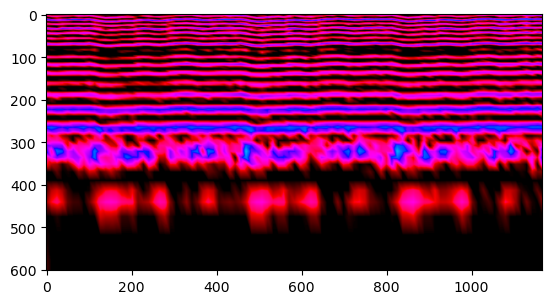

In [9]:
img_color = cv2.imread(noise[10])
plt.imshow(img_color)

In [11]:
width = 400
heigth = 250
dim = (width, heigth)

#resize image
img_resized = cv2.resize(img_color, dim, interpolation = cv2.INTER_AREA)

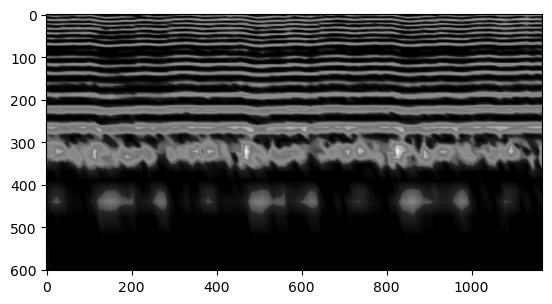

In [13]:
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

In [15]:
features,hog_img = hog(img_gray,
                       orientations = 11,
                       pixels_per_cell = (16,16),
                       cells_per_block = (2,2),
                       transform_sqrt = False,
                       visualize = True,
                       feature_vector = True)

In [17]:
features.shape

(112464,)

In [19]:
hog_img.shape

(602, 1167)

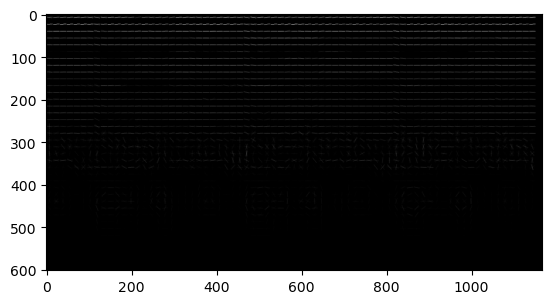

In [21]:
plt.imshow(hog_img,cmap = 'gray')

In [23]:
noise_hog_accum = []

width = 400
heigth = 250
dim = (width, heigth)

for i in noise:
    img_color = mpimg.imread(i)
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    noise_hog_feature, noise_hog_img = hog(img_resized,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    noise_hog_accum.append(noise_hog_feature)

In [25]:
X_noise = np.vstack(noise_hog_accum).astype(np.float64)
y_noise = np.ones(len(X_noise))

In [27]:
X_noise.shape

(500, 14784)

In [29]:
y_noise.shape

(500,)

In [31]:
nonoise_hog_accum = []

width = 400
heigth = 250
dim = (width, heigth)

for i in nonoise:
    img_color = mpimg.imread(i)
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    #resize image
    img_color = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    nonoise_hog_feature, nonoise_hog_img = hog(img_resized,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    nonoise_hog_accum.append(nonoise_hog_feature)

In [33]:
X_nonoise = np.vstack(nonoise_hog_accum).astype(np.float64)
y_nonoise = np.zeros(len(X_nonoise))

In [35]:
X_nonoise.shape

(500, 14784)

In [37]:
y_nonoise.shape

(500,)

In [39]:
X = np.vstack((X_noise,X_nonoise))
X.shape

(1000, 14784)

In [41]:
y = np.hstack((y_noise,y_nonoise))
y.shape

(1000,)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [45]:
X_train.shape

(700, 14784)

In [47]:
X_test.shape

(300, 14784)

In [49]:
#from sklearn.svm import LinearSVC

#svc_model = LinearSVC()
#svc_model.fit(X_train, y_train)
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [51]:
y_predict = svc_model.predict(X_test)

<Axes: >

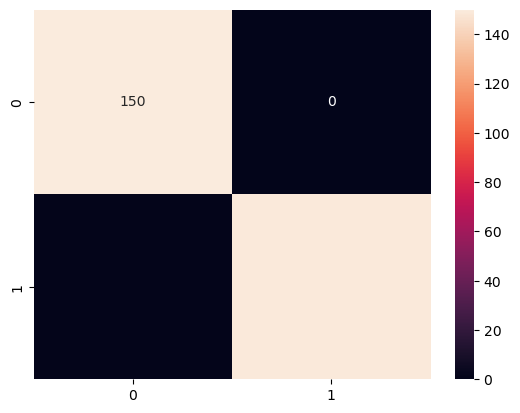

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")

In [55]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       150
         1.0       1.00      0.99      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [57]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [59]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=  13.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=  13.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=  12.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=  13.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=  13.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=  12.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=  14.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=  12.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=  13.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=  13.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=1.000 total time=   4.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [64]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [66]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [68]:
grid_predictions = grid.predict(X_test)

<Axes: >

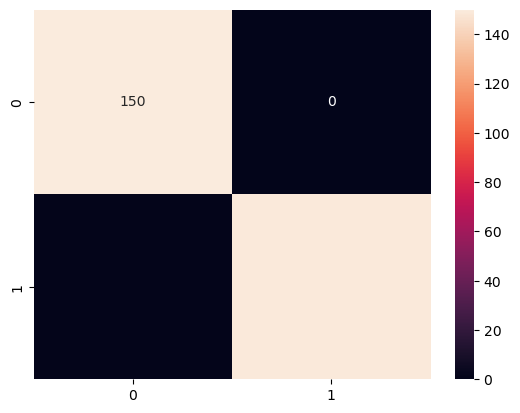

In [70]:
cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt = "d")

In [72]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       150
         1.0       1.00      0.99      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

